<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-0/TennisOrSquash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tennis vs Squash Image Classification (Tennis and Squash images are downloaded from google images using search string "Tennis playing" and "Squash playing". Then those images are separated as test and train folders to predict the Resnet34 model accuracy of classifying the image as either tennis or squash.)

##1. Magic Lines for module auto reload

In [0]:
#To plot the graph in the output cell and save it with notebook
%matplotlib inline

#To reload all modules before executing a new line
%reload_ext autoreload
%autoreload 2

##2. fast.ai Module Imports

In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

##3.Mount the google drive to access the data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##4. Loading the data using from_folder API. Folder tree - "path/train/tennis", "path/train/squash", "path/valid/tennis", "path/valid/squash"

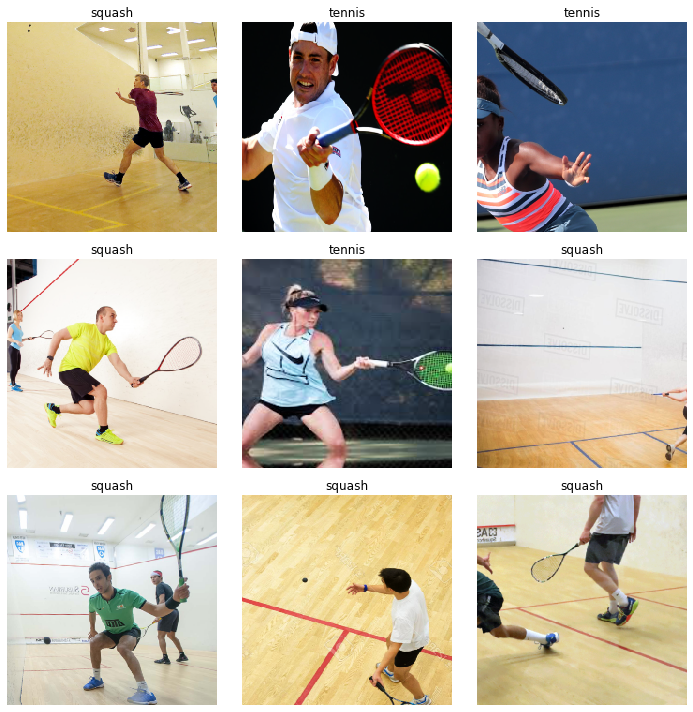

In [4]:
path = Path('/content/gdrive/My Drive/Colab Notebooks/tennis_squash_data')
bs=64
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(10,10))

##5. Using Resnet34 model to classify the images as either Tennis or **Squash**

In [5]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


##6. Number of Epochs chosen as 4 for learning rate

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.698804,0.269836,0.916667,02:04
1,0.425566,0.056705,0.966667,00:49
2,0.297725,0.048214,0.983333,00:47
3,0.218840,0.037243,1.000000,00:43


In [0]:
learn.save('stage-1')

##7. Displaying the test data that have top losses(errors). Though some have matching actual and predicted, their confidence probability is less.

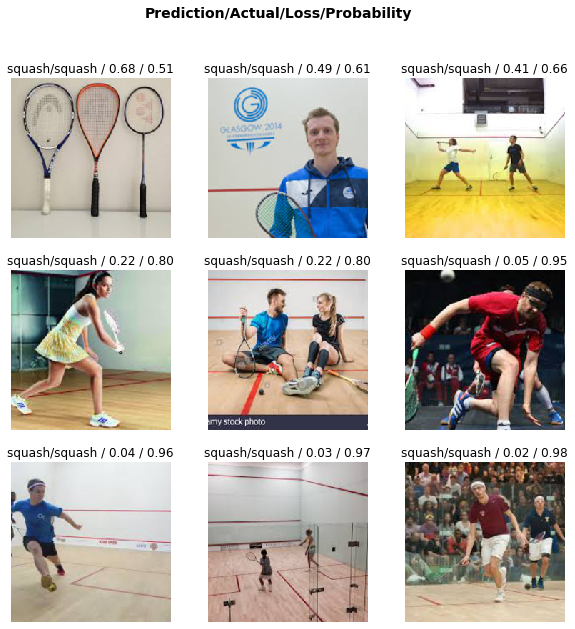

In [7]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(10,10))

##8. Confusion Matrix to evaluate the model (We can clearly see that model wrongly classifies 4 Squash images as Tennis Images)

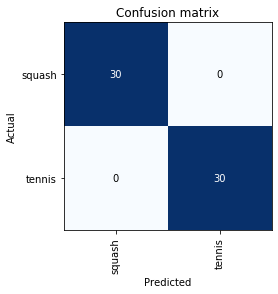

In [8]:
interp.plot_confusion_matrix()

##9. The RESNET model we used is pretrained model where the lower layers in network already learnt most of the basic patterns and shapes from huge datasets. We now unfreeze this model to enable the lower layers to start learning from our dataset.

In [0]:
learn.unfreeze()

##10. Now try to fit the train data to model by one epoch which will be used to find learning rate

In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.144787,1.005106,0.866667,00:45


##11. Find the Learning rate using lr_find()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


##12. Plot the LR curve

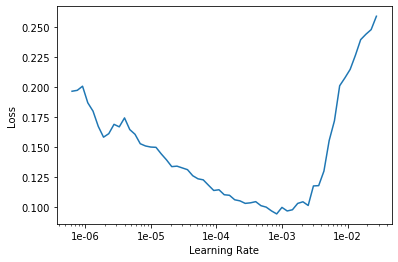

In [14]:
learn.recorder.plot()

##13. We can see here we achieve good accuracy with one or two epochs when we know the slice of upper bound and lower bound of learning curve.

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.030288,0.127752,0.966667,00:47
1,0.033926,0.186247,0.966667,00:47
